In [123]:
import pandas as pd 

In [124]:
df=pd.read_csv('./lending_bien/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [125]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [126]:
x=8045/(8045+1533)
x

0.8399457089162664

Si aceptasemos a todos los solicitantes el 83,9% de las personas devolverian el prestamo, tambien porque de los datos que disponemos solo el 16,1% no devuelven el prestamo

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [128]:
mapping_dict = {
    'debt_consolidation': 0,
    'all_other': 1,
    'credit_card': 2,
    'home_improvement': 3,
    'small_business': 4,
    'major_purchase': 5,
    'educational': 6


}
df['purpose'] = df['purpose'].map(mapping_dict)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,1,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [86]:
# No creo que influya el acertar si es moroso o no en esto

#cat_data = cat_data.copy()
#le = preprocessing.LabelEncoder()
#cat_data["purpose"] = le.fit_transform(cat_data["purpose"].astype(str))
#cat_data.head()

In [129]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

EQUILIBRAMOS LOS DATOS 

In [20]:
# !pip install -U imbalanced-learn

una técnica u otra:

SMOTE: accuracy del 0.7

Duplicar datos: accuracy del 0.7

__________

In [130]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [131]:
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

______________

In [88]:
# Importa las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
import pandas as pd

# Establece la semilla
seed = 40

# Define X_train e y_train
X_train = df.drop('not.fully.paid', axis=1)
y_train = df['not.fully.paid']

# Aplica SMOTE para equilibrar las clases
smo = SMOTE(sampling_strategy="auto", random_state=seed)
X_train_resampled, y_train_resampled = smo.fit_resample(X_train, y_train)

# Crea un nuevo DataFrame con los datos equilibrados
df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Muestra el nuevo DataFr
df['not.fully.paid'].value_counts()


not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

_________


In [132]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7442,1,1,0.1062,789.58,11.636911,0.28,797,7020.000000,633,1.1,0,0,0,0
6995,1,0,0.1287,815.61,11.512925,13.52,717,2970.000000,28056,57.0,0,0,0,0
7250,1,3,0.0788,312.81,10.422281,21.23,747,4735.000000,9736,16.7,2,0,0,0
4407,1,3,0.1357,679.37,11.512925,18.81,747,3630.000000,0,0.0,6,0,0,0
5190,1,0,0.1357,84.93,10.491274,19.90,672,2550.000000,2610,27.8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,2,0.0800,310.24,11.526828,3.19,777,8370.000000,1715,8.2,1,0,0,0
3672,1,3,0.0963,385.14,10.905938,7.46,752,5219.958333,5674,9.5,0,0,0,0
1115,1,0,0.1134,213.85,10.126471,11.23,682,2460.000000,2083,28.1,3,0,0,0
8381,0,6,0.1197,830.00,12.128111,22.72,727,5699.041667,226567,0.7,4,0,0,1


Separamos entre datos categoricos y datos numericos

In [133]:
data_cat=df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]

In [134]:
data_num=df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util", "not.fully.paid"]]

<Axes: >

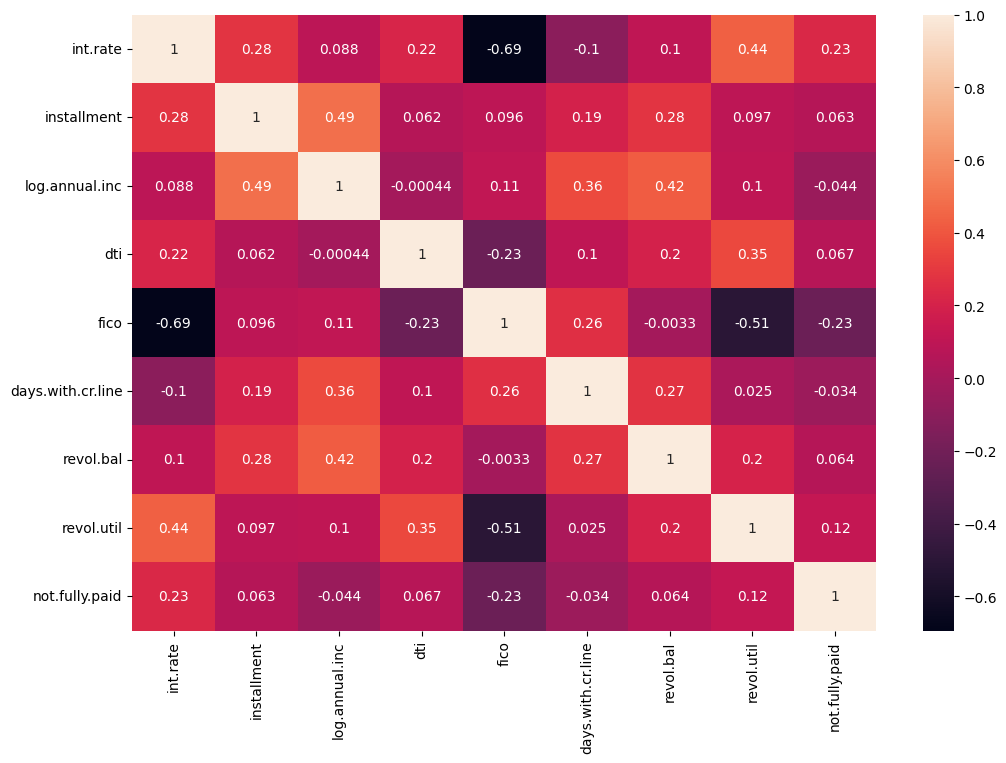

In [92]:

import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data_num.corr(), annot=True)

<Axes: >

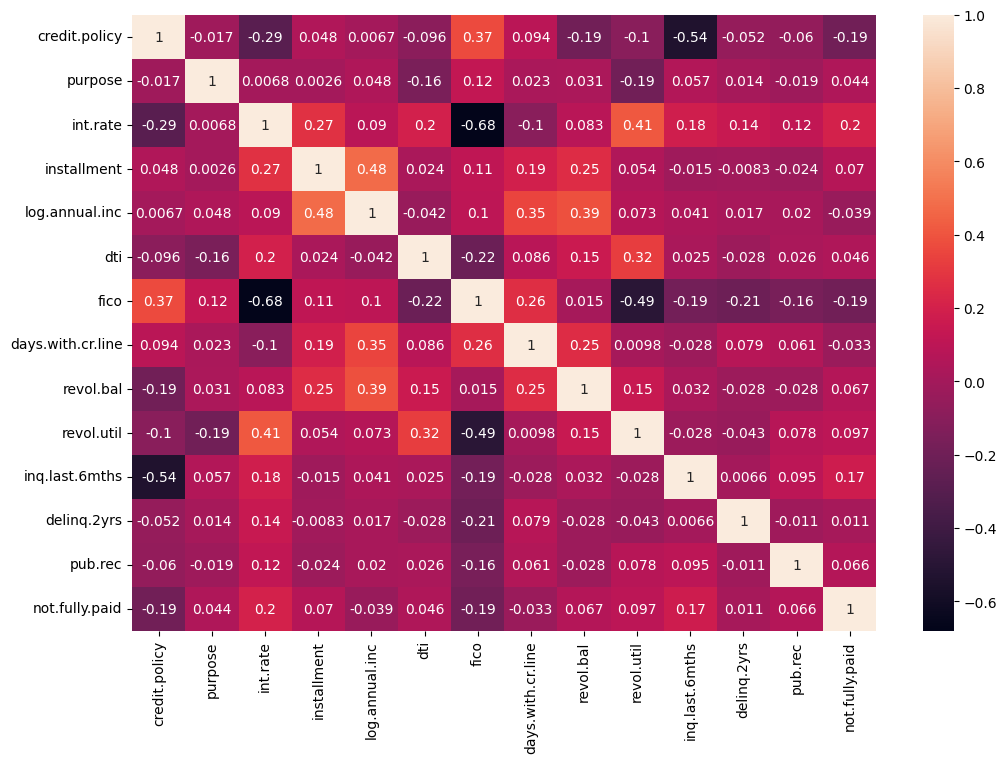

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

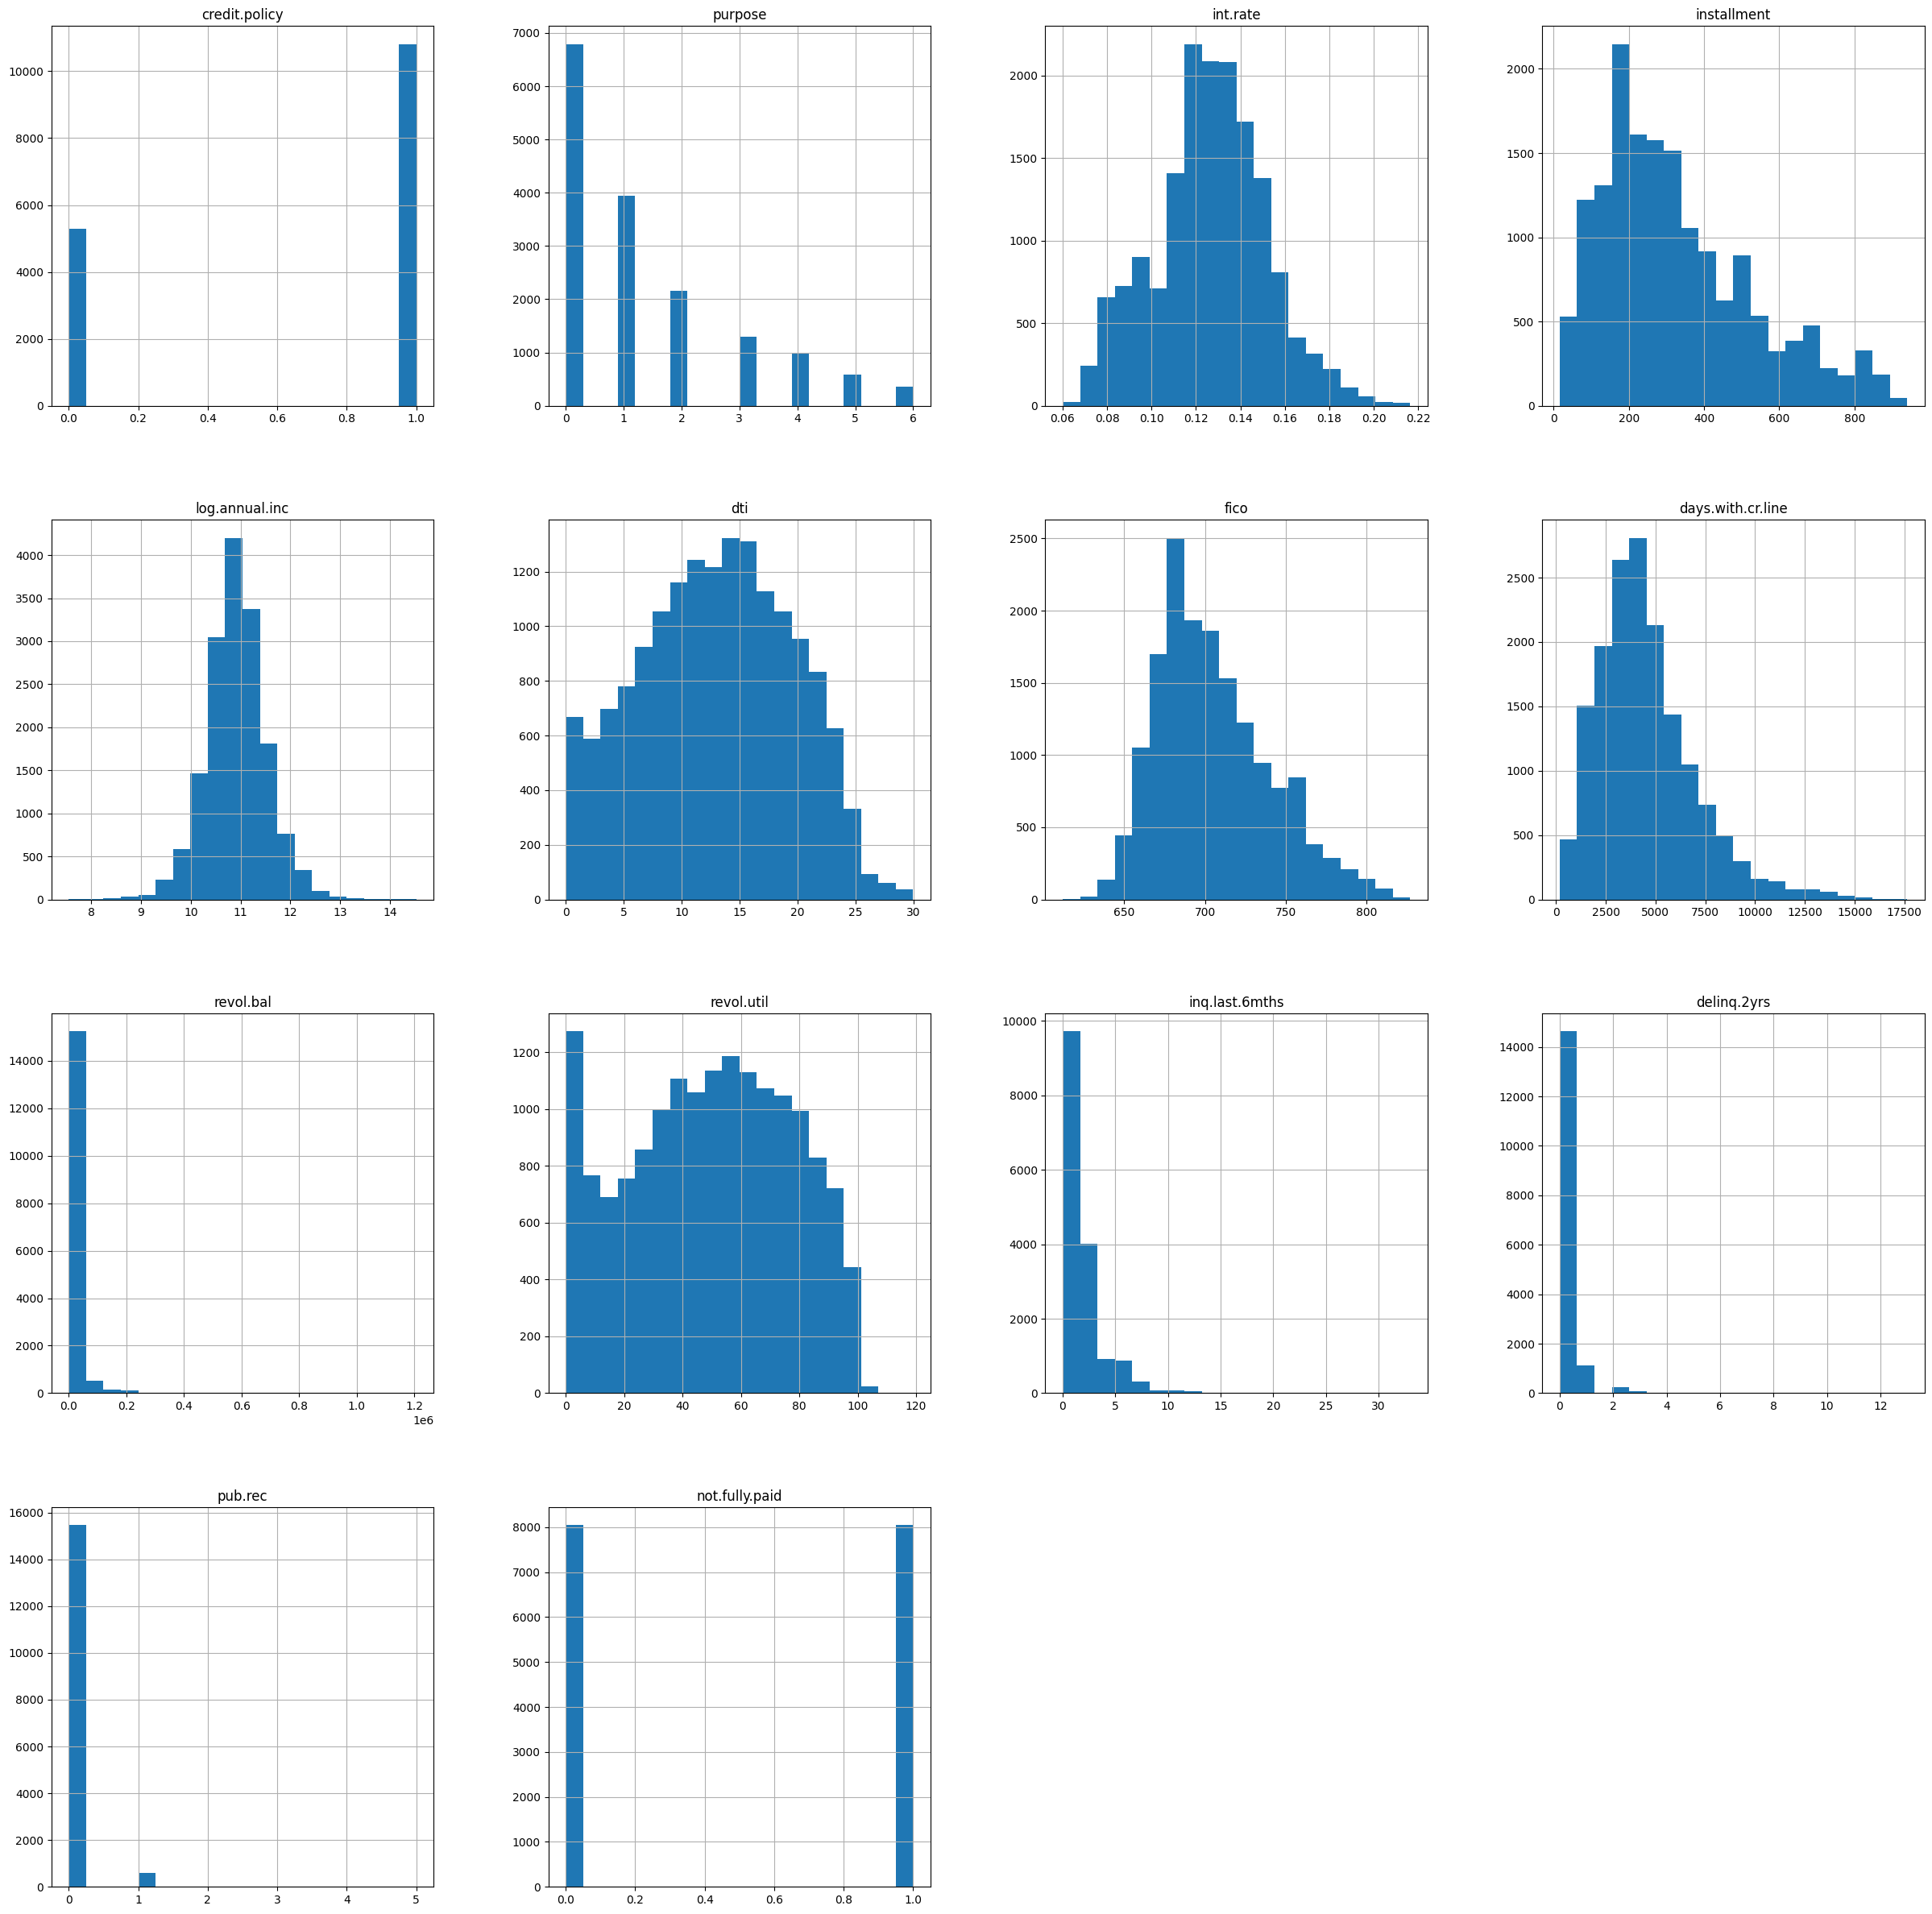

In [69]:
df_resampled.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

Ahora vamos a eliminar outliers

__________

Primero revisamos los datos numericos

In [135]:
import numpy as np
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)

In [136]:
for columna in data_num:
    detect_outlier(columna)

In [137]:
# Upper bounded outliers
for var in ['int.rate' ,'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'not.fully.paid']:
    df[var].clip(upper=df[var].quantile(.95), inplace=True)
    
# Lower and Upper bounded outliers
for var in ['log.annual.inc']:
    df[var].clip(lower = df[var].quantile(.05), upper = df[var].quantile(0.95), inplace=True)

In [138]:
from scipy.stats import skew

vars_skewed = data_num.apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

revol.bal            11.478323
days.with.cr.line     1.107980
installment           0.880557
fico                  0.564042
int.rate              0.155625
log.annual.inc        0.030383
dti                   0.011327
not.fully.paid        0.000000
revol.util           -0.029878
dtype: float64

In [139]:
high_skew = vars_skewed[abs(vars_skewed) > 0.3]
high_skew

revol.bal            11.478323
days.with.cr.line     1.107980
installment           0.880557
fico                  0.564042
dtype: float64

In [140]:
high_skew.index

Index(['revol.bal', 'days.with.cr.line', 'installment', 'fico'], dtype='object')

In [141]:
for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])

Ahora modificamos los datos categoricos

In [142]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7442,1,1,0.1062,6.672767,11.636911,0.28,6.656727,8.856661,6.452049,1.1,0,0,0,0
6995,1,0,0.1287,6.695329,11.512925,13.52,6.576470,7.996654,10.241993,57.0,0,0,0,0
7250,1,3,0.0788,5.748788,10.422281,21.23,6.617403,8.462948,9.183688,16.7,2,0,0,0
4407,1,3,0.1357,6.522637,11.512925,18.81,6.617403,8.197263,0.000000,0.0,6,0,0,0
5190,1,0,0.1357,4.453533,10.491274,19.90,6.511745,7.844241,7.867489,27.8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,2,0.0800,5.740564,11.526828,3.19,6.656727,9.032529,7.447751,8.2,1,0,0,0
3672,1,3,0.0963,5.956200,10.905938,7.46,6.624065,8.560436,8.643826,9.5,0,0,0,0
1115,1,0,0.1134,5.369940,10.126471,11.23,6.526495,7.808323,7.642044,28.1,3,0,0,0
8381,0,6,0.1197,6.695329,11.938193,22.72,6.590301,8.648229,11.039171,0.7,4,0,0,1


In [143]:
X = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'inq.last.6mths', 
        'credit.policy', 'purpose']]
y = df['not.fully.paid']

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [145]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
import keras

model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[8]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2304      
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 134145 (524.00 KB)
Trainable params: 134

In [147]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [148]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/500
51/51 [==============================] - 2s 20ms/step - loss: 0.6514 - binary_accuracy: 0.6078 - val_loss: 0.6384 - val_binary_accuracy: 0.6252
Epoch 2/500
51/51 [==============================] - 1s 14ms/step - loss: 0.6395 - binary_accuracy: 0.6238 - val_loss: 0.6318 - val_binary_accuracy: 0.6339
Epoch 3/500
51/51 [==============================] - 1s 16ms/step - loss: 0.6356 - binary_accuracy: 0.6273 - val_loss: 0.6325 - val_binary_accuracy: 0.6287
Epoch 4/500
51/51 [==============================] - 1s 15ms/step - loss: 0.6326 - binary_accuracy: 0.6289 - val_loss: 0.6306 - val_binary_accuracy: 0.6470
Epoch 5/500
51/51 [==============================] - 1s 15ms/step - loss: 0.6284 - binary_accuracy: 0.6300 - val_loss: 0.6242 - val_binary_accuracy: 0.6526
Epoch 6/500
51/51 [==============================] - 1s 15ms/step - loss: 0.6233 - binary_accuracy: 0.6381 - val_loss: 0.6220 - val_binary_accuracy: 0.6448
Epoch 7/500
51/51 [==============================] - 1s 13ms/ste

In [149]:
y_pred =(model.predict(X_test)>0.5).astype("int32")
              
y_pred

101/101 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.8769422001243008

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1610
           1       0.84      0.94      0.88      1608

    accuracy                           0.88      3218
   macro avg       0.88      0.88      0.88      3218
weighted avg       0.88      0.88      0.88      3218

